<a href="https://colab.research.google.com/github/Katie-Moses/DSPS_KMoses/blob/main/HW10/KMoses_Convolution_NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pylab as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

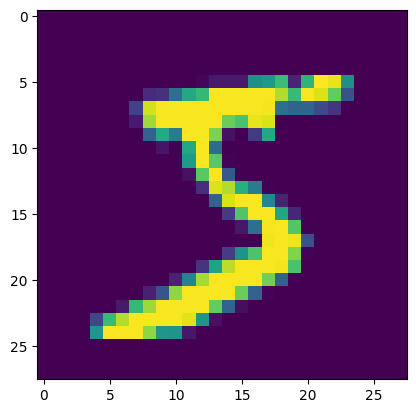

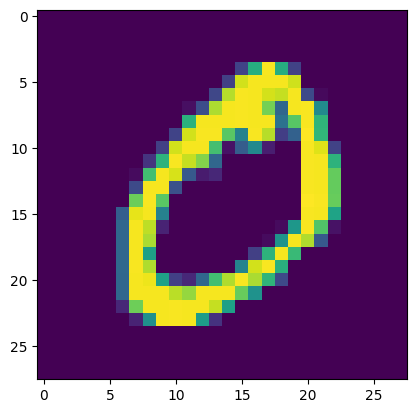

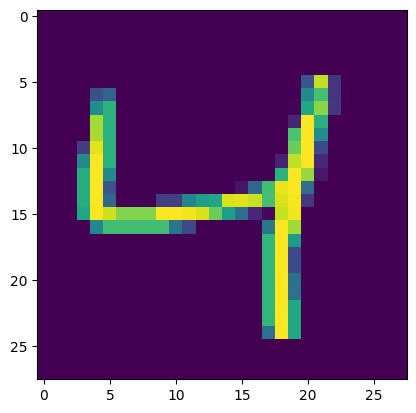

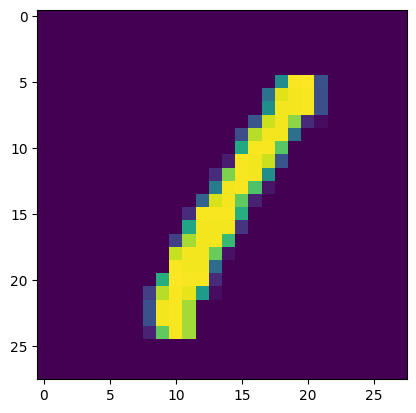

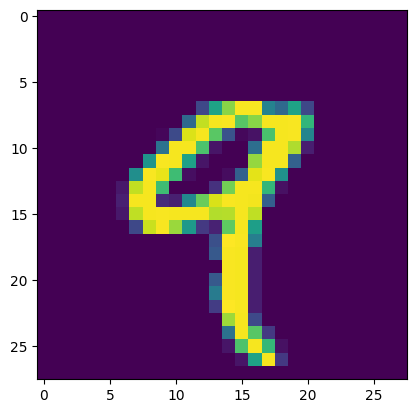

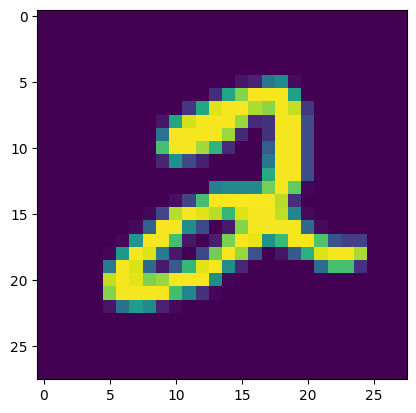

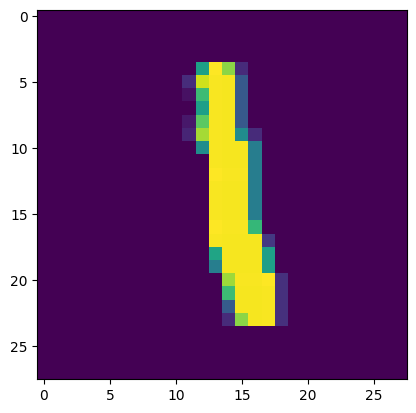

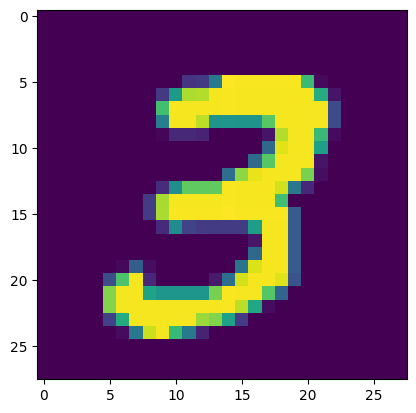

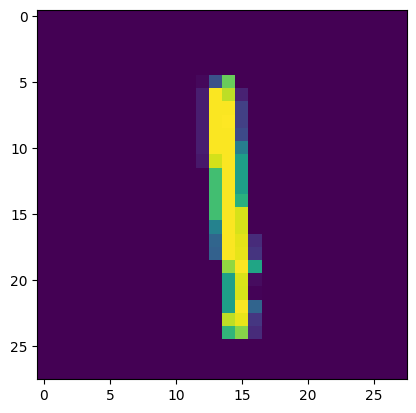

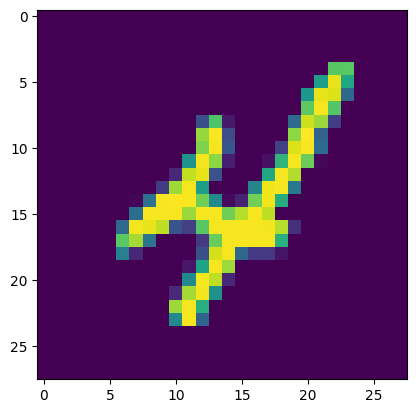

In [7]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.show()

> Figure 1: Set of images showing 10 different numbers as images to train an image-recognition neural network on.

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [9]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [10]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [11]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2] * x_train.shape[3])

In [12]:
x_trainraveled.shape

(60000, 784)

In [13]:
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2] * x_test.shape[3])

In [14]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [15]:
x_test.shape

(10000, 784)

In [16]:
mlp = keras.Sequential([
    layers.Dense(320, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax'), # size bounded by size of input, want softmax activation as well
])

In [17]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = mlp.fit(x_trainraveled, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4809 - loss: 1.9064 - val_accuracy: 0.8887 - val_loss: 0.6621
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9008 - loss: 0.5365 - val_accuracy: 0.9269 - val_loss: 0.3136
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9353 - loss: 0.2784 - val_accuracy: 0.9452 - val_loss: 0.2190
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9505 - loss: 0.1968 - val_accuracy: 0.9538 - val_loss: 0.1753
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9617 - loss: 0.1447 - val_accuracy: 0.9583 - val_loss: 0.1505
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9700 - loss: 0.1182 - val_accuracy: 0.9635 - val_loss: 0.1315
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9770 - loss: 0.0923 - val_accuracy: 0.9642 - val_loss: 0.1251
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9810 - loss: 0.0756 - val_accuracy: 0.

In [19]:
history.history

{'accuracy': [0.6846888661384583,
  0.909333348274231,
  0.9388666749000549,
  0.9530222415924072,
  0.9632889032363892,
  0.9710000157356262,
  0.9763333201408386,
  0.9808889031410217,
  0.9846222400665283,
  0.987333357334137],
 'loss': [1.4204719066619873,
  0.44870704412460327,
  0.2560209631919861,
  0.18299709260463715,
  0.14108212292194366,
  0.11198372393846512,
  0.09197009354829788,
  0.0749320387840271,
  0.061934858560562134,
  0.05193549767136574],
 'val_accuracy': [0.8887333273887634,
  0.9269333481788635,
  0.9452000260353088,
  0.9538000226020813,
  0.9583333134651184,
  0.963533341884613,
  0.9642000198364258,
  0.968666672706604,
  0.9682666659355164,
  0.9696666598320007],
 'val_loss': [0.6620686650276184,
  0.31355416774749756,
  0.21901026368141174,
  0.17530186474323273,
  0.15052150189876556,
  0.13151924312114716,
  0.12507189810276031,
  0.1138390302658081,
  0.11063575744628906,
  0.10736112296581268]}

Text(0.5, 1.0, 'Loss function of categorical neural network')

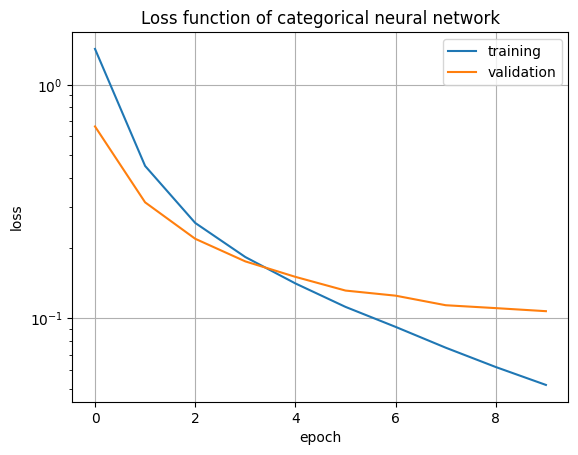

In [20]:
plt.plot(history.history['loss'], label="training")
plt.plot(history.history['val_loss'], label="validation")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.title("Loss function of categorical neural network")

> Figure 2: Loss function of categorical neural network over 10 epochs. Over each generation, the loss of the neural network decreases, which is good. However, since the loss of the training values starts to drop substantially below the loss of the test values, there is some overfitting in the model.

In [21]:
mlp.evaluate(x_testraveled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9669 - loss: 0.1134


[0.10126639157533646, 0.9707000255584717]

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [23]:
x_train.shape[1:]

(28, 28, 1)

In [24]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [25]:
from keras.layers import Input

model = Sequential([
  Input(shape=x_train.shape[1:]), # Recommended way to specify input shape in Sequential models
  Conv2D(32, kernel_size=(10, 10), activation='relu'),
  Conv2D(64, kernel_size=(3, 3), activation='relu'),
  MaxPooling2D(pool_size=(2, 2)),
  Conv2D(32, kernel_size=(3, 3), activation='relu'),
  MaxPooling2D(pool_size=(2, 2)),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')]) # Changed to 10 units to match the 10 classes of MNIST

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn = model.fit(x_train, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8008 - loss: 0.6692 - val_accuracy: 0.9605 - val_loss: 0.1271
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9690 - loss: 0.0999 - val_accuracy: 0.9769 - val_loss: 0.0749
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9788 - loss: 0.0666 - val_accuracy: 0.9796 - val_loss: 0.0697
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9850 - loss: 0.0472 - val_accuracy: 0.9845 - val_loss: 0.0548
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9889 - loss: 0.0366 - val_accuracy: 0.9811 - val_loss: 0.0661
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9905 - loss: 0.0305 - val_accuracy: 0.9817 - val_loss: 0.0668
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9911 - loss: 0.0280 - val_accuracy: 0.9859 - val_loss: 0.0480
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9930 - loss: 0.0218 - val_accuracy: 0.

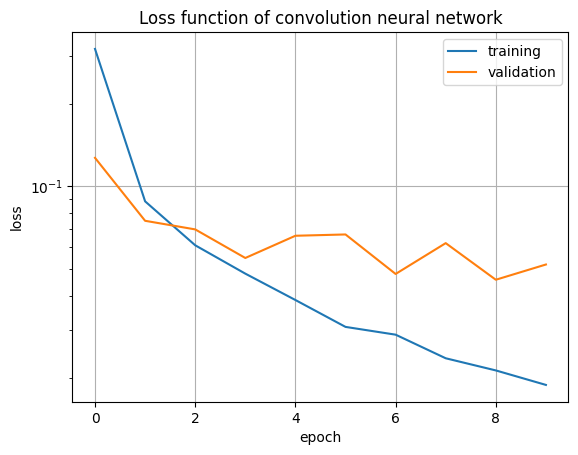

In [29]:
plt.plot(history_cnn.history['loss'], label="training")
plt.plot(history_cnn.history['val_loss'], label="validation")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.title("Loss function of convolution neural network")
plt.show()

> Figure 3: Loss function of the convolution neural network over 10 epochs. Similar to the results of the categorical neural network, there is an overfitting in the data after several epochs, which explains the gap between loss of training data compared to the test data. There is also a surprising oscilation in the loss function from the test data that was not present in the other neural network. This is likely a result of flucuations in the model that decrease performance.